In [3]:
import pandas as pd
import numpy as np
from numpy import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
from datetime import datetime
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import random

#pd.options.display.float_format = '{:.0f}'.format

import math
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from pandas_profiling import ProfileReport

from sklearn.feature_selection import f_regression
import operator

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#pip install pyod            # normal install
#pip install --upgrade pyod  # or update if needed
#pip install pandas-profiling

%matplotlib inline

In [12]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [13]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [14]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [15]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [16]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [17]:
# Definición de funciones ------------------------------------------------------------------------------------------

In [18]:
from sklearn.preprocessing import LabelEncoder

def Encoder(df_1, columna):
    # Fem label encoder de les variables categòriques origin i destination, que 
    df_1[columna].value_counts(ascending=False)
    encoder = LabelEncoder()
    df_1[columna]= encoder.fit_transform(df_1[columna])
    df_1.head()
    df_1[columna].value_counts(ascending=False)
    return df_1
    # Passem la funció de top features amb f_regression. N'agafem els 10 més importants:



In [19]:
def getTopFeatures(train_x, train_y, n_features=10):
    f_val, p_val = f_regression(train_x,train_y)
    f_val_dict = {}
    p_val_dict = {}
    for i in range(len(f_val)):
        if math.isnan(f_val[i]):
            f_val[i] = 0.0
        f_val_dict[i] = f_val[i]
        if math.isnan(p_val[i]):
            p_val[i] = 0.0
        p_val_dict[i] = p_val[i]
    
    sorted_f = sorted(f_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    sorted_p = sorted(p_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    
    feature_indexs = []
    for i in range(0,n_features):
        feature_indexs.append(sorted_f[i][0])
    
    return feature_indexs


In [20]:
def PrintRegressionValues(df_model, X_train,y_train, X_test,y_test, y_pred):
    
    print('Mean Absolute Error               :', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error                :', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error           :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    return

def PrintRegression(df_model, X_train,y_train, X_test,y_test, y_pred):

    #print("Shape X_train b         :", X_train.shape)
    #print("Shape X_test  b         :", X_test.shape)
    #print("Shape y_train b         :", y_train.shape)
    #print("Shape y_test  b         :", y_test.shape)
    #print("Shape y_pred  b         :", y_pred.shape)
    
    # pasamos el df a numpy para graficar
    #OJO y_test = y_test.values.reshape(len(y_test), 1) 
    
    #print("before :", y_test)
    y_test = y_test.reshape(len(y_test), 1) 
    #print("after :", y_test)
    
    # pasamos el df a numpy para graficar
    dfw = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) 
    # el método flatten() devuelve una copia del array a una única dimensión
    #print(dfw.head())
    #Por el resultado del gráfico parece que sí hemos podido mejorar nuestro algoritmo.
    dfw1 = dfw.head(30) 
    # Vamos a graficar las 30 primeras entradas 
    dfw1.plot(kind='bar',figsize=(14,9))
    plt.show()

    # Vamos a trazar nuestra línea recta con los datos de la prueba para ver la predicción. La línea recta del gráfico muestra que nuestro algoritmo es bastante correcto.
    # En este caso, vamos a a visualizar la correlación entre los datos reales y los datos predecidos, ya que X_test es multidimensional. 
    # En este caso vemos que el gráfico muestra una línea bastante recta, lo que nos dice que nuestro algoritmo es bastante correcto.

    fig, ax = plt.subplots(figsize = (14, 5))

    #print("Shape X_train a         :", X_train.shape)
    #print("Shape X_test  a         :", X_test.shape)
    #print("Shape y_train a         :", y_train.shape)
    #print("Shape y_test  a         :", y_test.shape)
    #print("Shape y_pred  a         :", y_pred.shape)
    
    #OJO plt.scatter(X_test, y_test,  color='gray')
    plt.scatter(dfw['Predicted'], dfw['Actual'], color='green')
    #plt.plot(X_test, y_pred, color='red', linewidth=1)
    plt.show()
    
    return

def PrintRelevantFeatures(title, df, df_model, X_train,y_train, X_test,y_test, y_pred):

    i_col = (df.drop([forecast_col], 1))
    plt.figure(figsize=(10,7))
    feat_importances = pd.Series(df_model.feature_importances_, index = i_col.columns)
    plt.title(title)
    feat_importances.nlargest(5).plot(kind='barh');
    
    return

def PrintRegressionAdvance(title, df, df_model, X_train,y_train, X_test,y_test, y_pred):
    
    sns.pairplot(df, x_vars=[df.columns], y_vars=[forecast_col],height=5, aspect=.8, kind="reg");
    
def PrintTree(title, df, df_model, X_train,y_train, X_test,y_test, y_pred):
    # Import tools needed for visualization
    from sklearn.tree import export_graphviz
    import pydot
    
    # Extract the small tree
    tree_small = df_model.estimators_[5]
    # Save the tree as a png image
    export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_train.columns, rounded = True, precision = 1)
    (graph, ) = pydot.graph_from_dot_file('small_tree.dot')
    graph.write_png('small_tree.png');
    
    return

In [67]:
def LinearRegressionCustom(df_set, normalize, fit_intercept, X_train,y_train, X_test,y_test, printRegression , printRelevantAttributes):

    #OJO CHANGED
    # Determinem 'n-jobs' = -1 perquè faci servir tots els processadors disponibles. 
    
    clf_model = LinearRegression(normalize=normalize, fit_intercept=fit_intercept, n_jobs=-1)

    # Creamos el modelo y lo ajustamos
    clf_model.fit(X_train, y_train)

    # Fem la predicció
    y_pred = clf_model.predict(X_test)
    # print('predicted response:', y_pred, sep='\n')

    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_train = clf_model.score(X_train, y_train)
    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_test = clf_model.score(X_test, y_test)


    # Df comparatiu de l'X_test i la seva corresponent predicció:

    df_lr = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df_lr
    print('El coeficiente de determinación del train es:', score_train)
    print('El coeficiente de determinación del test  es:', score_test)

    print('intercept                         :', clf_model.intercept_) 
    #print('coefficients                      :', clf_model.coef_ , sep='\n') 

    
    PrintRegressionValues(df_lr, X_train,y_train, X_test,y_test, y_pred)
    
    if printRegression:
        PrintRegression(df_lr, X_train,y_train, X_test,y_test, y_pred)
    
    if printRelevantAttributes:
        PrintRelevantFeatures('LinearRegression ', df_set, clf_model, X_train,y_train, X_test,y_test, y_pred)
    
    return


In [68]:
def OLSLinearRegressionCustom(df_set, X_train,y_train, X_test,y_test, printRegression , printRelevantAttributes):

    #X_addC = sm.add_constant(X)
    #result = sm.OLS(Y, X_addC).fit()
    #print(result.rsquared, result.rsquared_adj)

    ols_model = sm.OLS(y_train, X_train )

    # Creamos el modelo y lo ajustamos
    ols_model.fit()

    # Fem la predicció
    y_pred = ols_model.predict(X_test)
    # print('predicted response:', y_pred, sep='\n')

    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_test = ols_model.results.rsquared_adj

    ols_model.summary()
    
    # Df comparatiu de l'X_test i la seva corresponent predicció:

    df_lr = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df_lr
    print('El coeficiente de determinación es:', score_test)

    print('intercept                         :', clf_model.intercept_) 
    #print('coefficients                      :', clf_model.coef_ , sep='\n') 

    
    PrintRegressionValues(df_lr, X_train,y_train, X_test,y_test, y_pred)
    
    if printRegression:
        PrintRegression(df_lr, X_train,y_train, X_test,y_test, y_pred)
    
    if printRelevantAttributes:
        PrintRelevantFeatures('LinearRegression ', df_set, ols_model, X_train,y_train, X_test,y_test, y_pred)
    
    return


In [69]:
def DecisionTreeRegressorCustom(df_set, n_estimator,  X_train, y_train, X_test, y_test, printRegression, printRelevantAttributes):

    #OJO CHANGED
    
    regressor_model = DecisionTreeRegressor(max_depth=n_estimator, random_state=0)
    regressor_model.fit(X_train,y_train)

    # Fem la predicció
    y_pred = regressor_model.predict(X_test)
    # print('predicted response:', y_pred, sep='\n')

    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_train = regressor_model.score(X_train, y_train)
    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_test = regressor_model.score(X_test, y_test) 

    # Comparem les prediccions de l'X_test amb el retard d'arribada de veritat(y_test):
    df_rt=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df_rt
    # print('Absolute Error:', abs(y_test - y_pred).sum())
    print('El coeficiente de determinación Train es :', score_train)
    # print('Absolute Error:', abs(y_test - y_pred).sum())
    print('El coeficiente de determinación Test  es :', score_test)


    PrintRegressionValues(df_rt, X_train,y_train, X_test,y_test, y_pred)
    
    if printRegression:
        PrintRegression(df_rt, X_train,y_train, X_test,y_test, y_pred)

    if printRelevantAttributes:
        PrintRelevantFeatures('DecisionTreeRegressor', df_set, regressor_model, X_train,y_train, X_test,y_test, y_pred)
    
    return

In [70]:
def RandomForestRegressorCustom(df_set, n_estimators , max_depth, X_train, y_train, X_test, y_test, printRegression, printRelevantAttributes):
 
    #OJO CHANGED
    
    #https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

    #n_estimatorsint, default=100
    #max_depthint, default=None
    #min_samples_splitint or float, default=2
    #min_samples_leafint or float, default=1
    #min_weight_fraction_leaffloat, default=0.0
    #max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
    #max_leaf_nodesint, default=None
    #min_impurity_decreasefloat, default=0.0
    #bootstrapbool, default=True

    rf_model = RandomForestRegressor(n_estimators , random_state = 42)
    #rf_model = RandomForestRegressor(n_estimators , random_state = 42,bootstrap = True, verbose=2)

    rf_model.fit(X_train, y_train)

    # Fem la predicció
    # Ahora hagamos una predicción sobre los datos de la prueba.
    y_pred=rf_model.predict(X_test)
    # print('predicted response:', y_pred, sep='\n')

    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_train = rf_model.score(X_train, y_train)
    # Calculamos el R2 para comprovar el ajuste en cada modelo.
    score_test = rf_model.score(X_test, y_test) 

    # Comparem les prediccions de l'X_test amb el retard d'arribada de veritat(y_test):
    #Revisemos la diferencia entre el valor real y el valor predecido.
    df_rf=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
    df_rf
    
    # print('Absolute Error:', abs(y_test - y_pred).sum())
    print('El coeficiente de determinación Train es :', score_train)
    # print('Absolute Error:', abs(y_test - y_pred).sum())
    print('El coeficiente de determinación Test  es :', score_test)

    PrintRegressionValues(df_rf, X_train,y_train, X_test,y_test, y_pred)
    
    if printRegression:
        PrintRegression(df_rf, X_train,y_train, X_test,y_test, y_pred)

    if printRelevantAttributes:
        PrintRelevantFeatures('RandomForestRegressor', df_set, rf_model, X_train,y_train, X_test,y_test, y_pred)
        #PrintRegressionAdvance('RandomForestRegressor', df_set, rf_model, X_train,y_train, X_test,y_test, y_pred)
        #PrintTree('RandomForestRegressor', df_set, rf_model, X_train,y_train, X_test,y_test, y_pred)
    
    return

In [25]:
def RegressionChart(n_estimator, typemodel, typeofchange, X_train, y_train, X_test, y_test):
    
    train_results = []
    test_results = []
    
        #'RandomForestRegressor', 'min_samples_leafs
        
    for estimator in n_estimator:
        if (  typemodel == 'RandomForestRegressor' and typeofchange == 'n_estimator'):
            #print("typemodel == 'RamdomForestRegressor' and typeofchange == 'n_estimator'")
            dt = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
        elif (typemodel == 'RandomForestRegressor' and typeofchange == 'max_depths') :
            #print("typemodel == 'RamdomForestRegressor' and typeofchange == 'max_depths'")
            dt = RandomForestRegressor(max_depth=estimator)
        elif (typemodel == 'RandomForestRegressor' and typeofchange == 'min_samples_splits'):
            #print("typemodel == 'RamdomForestRegressor' and typeofchange == 'min_samples_split'")
            dt = RandomForestRegressor(min_samples_split= estimator)
        elif (typemodel == 'RandomForestRegressor' and typeofchange == 'min_samples_leafs') :
            #print("typemodel == 'RamdomForestRegressor' and typeofchange == 'min_samples_leaf'")
            dt = RandomForestRegressor(min_samples_leaf= estimator)
        elif (typemodel == 'RandomForestRegressor' and typeofchange == 'max_features') :
            #print("typemodel == 'RamdomForestRegressor' and typeofchange == 'max_features'")
            dt = RandomForestRegressor(max_features= estimator)
        elif (typemodel == 'DecisionTreeRegressor' and typeofchange == 'max_depth') :
            #print("typemodel == 'DecisionTreeRegressor' and typeofchange == 'max_depth'")
            dt = DecisionTreeRegressor(max_depth= estimator)
        elif (typemodel == 'DecisionTreeRegressor' and typeofchange == 'min_samples_splits') :
            #print("typemodel == 'DecisionTreeRegressor' and typeofchange == 'min_samples_splits'")
            dt = DecisionTreeRegressor(min_samples_split= estimator)
        elif (typemodel == 'DecisionTreeRegressor' and typeofchange == 'min_samples_leafs') :
            #print("(typemodel == 'DecisionTreeRegressor' and typeofchange == 'min_samples_leafs')")
            dt = DecisionTreeRegressor(min_samples_leaf= estimator)
        elif (typemodel == 'DecisionTreeRegressor' and typeofchange == 'max_features')  :
            #print("typemodel == 'DecisionTreeRegressor' and typeofchange == 'max_features'")
            dt = DecisionTreeRegressor(max_features= estimator)
        else:
            print("no pasa por ninguno")
            
        dt.fit(X_train, y_train)  
        train_pred = dt.predict(X_train)

        train_results.append(metrics.mean_absolute_error(y_train, train_pred))
        y_pred = dt.predict(X_test)
        test_results.append(metrics.mean_absolute_error(y_test, y_pred))
    
    from matplotlib.legend_handler import HandlerLine2D

    line1, = plt.plot(n_estimator, train_results, 'b', label='Train MAE')
    line2, = plt.plot(n_estimator, test_results , 'r', label='Test MAE')
    plt.title(type)
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel('MAE score')
    plt.xlabel('typeofchange : ' + typeofchange)
    plt.show()

    return
                                       

In [26]:
def UseCaseModelizacion (df_set, X_train, y_train, X_test, y_test ):
    
    print("LinearRegression sense train/test (validació interna):")
    
    Normalize = False
    fit_intercept=True
    LinearRegressionCustom(df_set, Normalize, fit_intercept, X_train, y_train, X_test, y_test, False, False )
    
    print("-------------------------------------------------------")

    print("DecisionTreeRegressor sense train/test (validació interna):")
    
    max_depth=15

    DecisionTreeRegressorCustom(df_set, max_depth, X_train, y_train, X_test, y_test, False, True)
    
    print("-------------------------------------------------------")
    
    print("RandomForestRegressor sense train/test (validació interna):")
    
    n_estimators = 30
    max_depth=30

    RandomForestRegressorCustom(df_set, n_estimators , max_depth, X_train, y_train, X_test, y_test, False, True)
    
    print("-------------------------------------------------------")
    


In [27]:
# Fin de la definición de variables ------------------------------------------------------------

In [28]:
# Fin de la definición de variables ------------------------------------------------------------

In [29]:
# Fin de la definición de variables ------------------------------------------------------------

In [30]:
# Fin de la definición de variables ------------------------------------------------------------

In [31]:
# Fin de la definición de variables ------------------------------------------------------------

In [32]:
# Fin de la definición de variables ------------------------------------------------------------

In [4]:
df = pd.read_csv('C:\\Users\\comercial7\\Documents\\PERSONAL\\datascience\\DelayedFlights.csv', sep=",", encoding='utf8')
df_original = df.copy()
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [6]:
df.shape


(1936758, 30)

In [7]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], dtype='object')

In [41]:
# Miramos los valores NaN que tienen las columnas
# Comprabamos las columnas que tienen valores NaN, ya que los modelos de regresión en python no aceptan estos valores

total_nan_values = df.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

#Para acceder a los valores de las columnas por si hay que hacer alguna automatizacion
#total_nan_values.values

Total Number of NaN values: 
Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
FlightNum                 0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [42]:
#idnetificamos las columnas que tiene NAN
ColumnsWithNaN = total_nan_values[(total_nan_values.values != 0) ]

In [43]:
#Mostramos las columnas, como se puede acceder a ellas por si queremos hacer un bucle que haga algo con ellas de forma más automática sin tener que ir una a una
ColumnsWithNaN.index

Index(['ArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], dtype='object')

reemplazamos los valores faltantes por la media aritmética de la respectiva variable para evitar pérdida de datos

In [44]:
# Mostra que tipo de valor tiene que columna de las seleccionadas, para hacer un proceso diferente
columns = ColumnsWithNaN.index
for i in columns:
    # Matriz de correlación  #
    print(df[i].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [45]:
#sabiendo como diferenciar el tipo de dato de las columnas, las columnas numero en los valores nan pongo la mediana, y si es una columna categorica, la elimino del dataset que vamos analizar
columns = ColumnsWithNaN.index
for i in columns:
    # Matriz de correlación  #
    if df[i].dtypes != object :
        df[i]=df[i].fillna(df[i].mean())
        print("Columna que acabamo de substituir NaN por Mediana   : ", i)
    else:    
        print("Columna que acabamos de elimiar por ser categrorica : ", i)
        df.drop(i, axis=1, inplace=True)



Columna que acabamo de substituir NaN por Mediana   :  ArrTime
Columna que acabamo de substituir NaN por Mediana   :  ActualElapsedTime
Columna que acabamo de substituir NaN por Mediana   :  CRSElapsedTime
Columna que acabamo de substituir NaN por Mediana   :  AirTime
Columna que acabamo de substituir NaN por Mediana   :  ArrDelay
Columna que acabamo de substituir NaN por Mediana   :  TaxiIn
Columna que acabamo de substituir NaN por Mediana   :  TaxiOut
Columna que acabamo de substituir NaN por Mediana   :  CarrierDelay
Columna que acabamo de substituir NaN por Mediana   :  WeatherDelay
Columna que acabamo de substituir NaN por Mediana   :  NASDelay
Columna que acabamo de substituir NaN por Mediana   :  SecurityDelay
Columna que acabamo de substituir NaN por Mediana   :  LateAircraftDelay


In [46]:
#comprobamos que despues de los cambios ya no hayan columnas con NAN
total_nan_values = df.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


In [47]:
#aqui lo importante es que esta dentro de un bucle, y se puede hacer este analisi sin tener que ir columna a columna
#y luego las borra para no tenerlas en cuenta en el ejercicio
columns = df.columns
for i in columns:
    # Matriz de correlación  #
    if df[i].dtypes == object :
        print('Columna que será borrada: ',i)
        #print(" y tiene {} elmentos.",len(df[i].unique()))
        df.drop(i, axis=1, inplace=True)

Nivell 1
- Exercici 1
Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [48]:
#variable dependiente (retraso en la llegada) que queremos estimar

forecast_col ='ArrDelay'

In [49]:
#Muestra y división en train i test tomando 100.000 registro para evitar largos periodos de proceso

print("Columnas de la muestra original :", len(df))
df_sample = df.sample(100000, random_state = 0)
print("Columnas de la muestra sample :", len(df_sample))
# Features = X
# Labels = y

# Asignamos las variables con las que vamos a trabajar en el algoritmo
#variable independiente (hora de salida, ....)
X = np.array(df_sample.drop([forecast_col], 1))
#x= np.array(df_sample['DepDelay']).reshape((-1, 1))

#variable dependiente (retraso en la llegada)
y = np.array(df_sample[forecast_col])
#y= df_sample['ArrDelay'] 

# Comprovem que tinguin la mateixa len
print("Tamaño muestra x y y :", len(X), len(y))

# Creem el train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


Columnas de la muestra original : 1936758
Columnas de la muestra sample : 100000
Tamaño muestra x y y : 100000 100000


In [50]:
print("Shape X_train ", X_train.shape)
print("Shape X_test  ", X_test.shape)
print("Shape y_train ", y_train.shape)
print("Shape y_test  ", y_test.shape)

Shape X_train  (80000, 24)
Shape X_test   (20000, 24)
Shape y_train  (80000,)
Shape y_test   (20000,)


In [55]:
#Modelización del caso de uso sin split

LinearRegression sense train/test (validació interna):
El coeficiente de determinación del train es: 0.9843336959822446
El coeficiente de determinación del test  es: 0.9843336959822446
intercept                         : -3.26815586974525
Mean Absolute Error               : 2.2643469370648623
Mean Squared Error                : 51.59406978905413
Root Mean Squared Error           : 7.182901209751818
-------------------------------------------------------
DecisionTreeRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9953693446764531
El coeficiente de determinación Test  es : 0.9953693446764531
Mean Absolute Error               : 2.235475599281426
Mean Squared Error                : 15.2502053873945
Root Mean Squared Error           : 3.9051511350259545
-------------------------------------------------------
RandomForestRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9989711926121598
El coeficiente de 

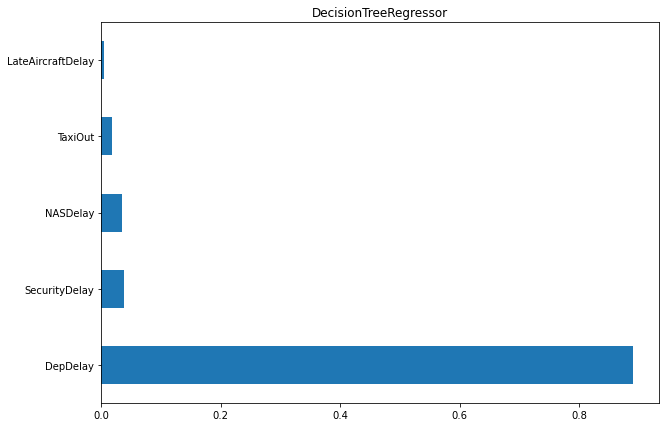

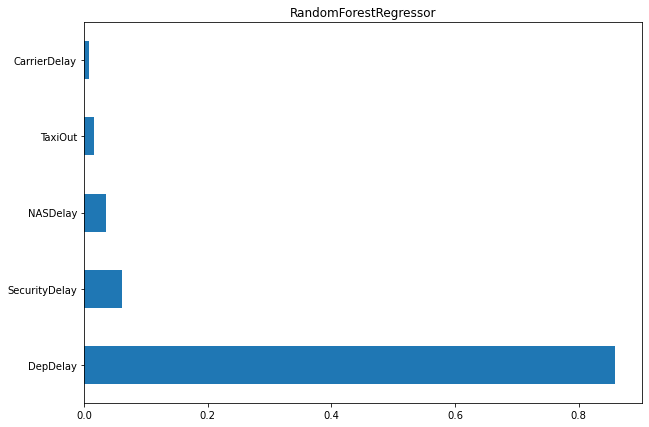

In [71]:
UseCaseModelizacion (df_sample,  X, y, X, y )

In [72]:
#Modelización del caso de uso con split

LinearRegression sense train/test (validació interna):
El coeficiente de determinación del train es: 0.9830996792315131
El coeficiente de determinación del test  es: 0.9891633930223985
intercept                         : -3.492466748761032
Mean Absolute Error               : 2.414866780359931
Mean Squared Error                : 35.51471911996279
Root Mean Squared Error           : 5.959422717005632
-------------------------------------------------------
DecisionTreeRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9955800459877943
El coeficiente de determinación Test  es : 0.9861997712639203
Mean Absolute Error               : 3.322638712207149
Mean Squared Error                : 45.227371294920765
Root Mean Squared Error           : 6.725129834800274
-------------------------------------------------------
RandomForestRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9985741878756131
El coeficiente de

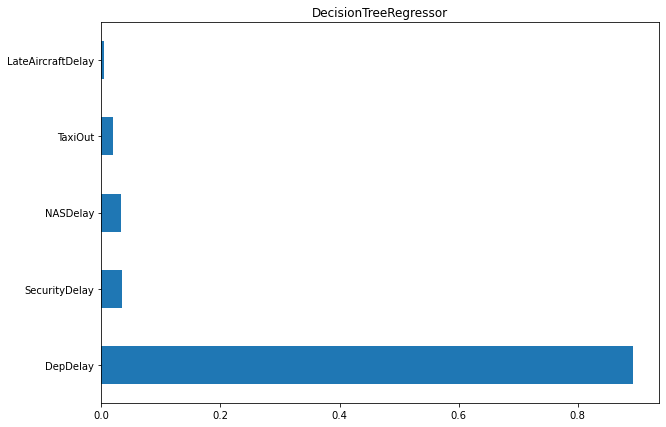

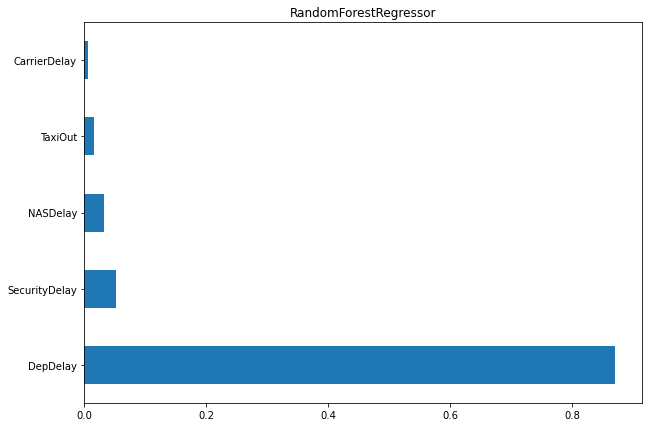

In [73]:
UseCaseModelizacion (df_sample,  X_train, y_train, X_test, y_test )

In [74]:
# Conclusiones: Utilizando el modelo de regresion Random Forest (en cualquiera de las dos versiones que hemo hecho) mejora con respecto al modelo de regresión lineal.

# Hay que revisar en cuanto a las dos versiones de random forest modificando los parámetros. La mejora de uno respecto al otro es muy sutil, pero hay mejora.


# COMPARACIÓN EN BASE A R2 
# El ajuste del modelo (coefficient of determination) en todos los modelos es superior a 0.90, es bastante bueno.

# COMPARACIÓN EN BASE A MSE (mean squared error) #
# El error cuadrático medio es el criterio de evaluación más usado para problemas de aprendizaje supervisado de regresión y nos proporciona información sobre cuán cerca están los puntos de datos observados de los valores predichos del modelo. Cuanto mayor sea este valor, peor es el modelo

# Para comprobar si el MSE se debe a valores atípicos. Para ello se calcula el MAE(mean_absolute_error), donde el error se calcula como un promedio de diferencias absolutas entre los valores objetivo y las predicciones. 
# En este caso todas las diferencias individuales se ponderan por igual en el promedio, por lo que MAE (mean_absolute_error) es MENOS sensible a los valores atípicos que el error cuadrático medio. 


# Nivell 2
## Exercici 2
### Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [85]:
# Es realitza procés d’enginyeria de variables per millorar-ne la predicció

# En los ejercicios anteriores hemos visto que el modelo de regresión lineal simple era el menos preciso, por muy poco, de los 3
# modelos, pero quizá podría mejorarse el el algoritmo si eliminamos los outliers y standarizamos los valores y, por tanto, 
# realizar predicciones mucho más ajustadas. Vamos a verlo.  

# Fins ara el que hem fet en relació a la enginyeria de variables ha estat: eliminar columnes categòriques, imputar els null values i visualitzar els features importance dels algoritmes de Decision Tree i Random Forest.
# Ara intentarem millorar els models inicials o si més no veure quin efecte tenen diferents maneres de fer enginyeria de variables.


In [86]:
#Recuperació de les variables categòriques
df = df_original.copy()
df


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [87]:
df.head(5)

# Eliminem les features que no aporten

df_1 = df
df_1.drop('Unnamed: 0', axis=1, inplace = True)
df_1


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [88]:
# Que variables categoricas hay para hacer un codificacion y poder utilizar en los modelos de regresión

for i in df_1.columns:
    # Matriz de correlación  #
    if df_1[i].dtypes == object :   
        print("Columna categorica : ", i)

Columna categorica :  UniqueCarrier
Columna categorica :  TailNum
Columna categorica :  Origin
Columna categorica :  Dest
Columna categorica :  CancellationCode


In [89]:
df_1 = Encoder(df_1, 'Origin') 
df_1 = Encoder(df_1, 'Dest') 
df_1 = Encoder(df_1, 'UniqueCarrier') 
df_1 = Encoder(df_1, 'CancellationCode') 

df_1.drop('TailNum', axis=1, inplace = True)



In [90]:
df_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,17,335,128.0,150.0,116.0,-14.0,8.0,135,286,810,4.0,8.0,0,3,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,17,3231,128.0,145.0,113.0,2.0,19.0,135,286,810,5.0,10.0,0,3,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,17,448,96.0,90.0,76.0,14.0,8.0,140,48,515,3.0,17.0,0,3,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,17,3920,90.0,90.0,77.0,34.0,34.0,140,48,515,3.0,10.0,0,3,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,17,378,101.0,115.0,87.0,11.0,25.0,140,150,688,4.0,10.0,0,3,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,6,1621,147.0,152.0,120.0,25.0,30.0,199,18,906,9.0,18.0,0,3,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,6,1631,127.0,109.0,78.0,75.0,57.0,241,18,481,15.0,34.0,0,3,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,6,1631,162.0,143.0,122.0,99.0,80.0,18,137,689,8.0,32.0,0,3,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,6,1639,115.0,117.0,89.0,9.0,11.0,135,18,533,13.0,13.0,0,3,0,NaN,NaN,NaN,NaN,NaN


In [91]:
#comprobamos que despues de los cambios ya no hayan columnas con NAN
total_nan_values = df_1.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [92]:
for i in df_1.columns:
    df_1[i].fillna(df_1[i].median(), inplace = True)

In [93]:
#comprobamos que despues de los cambios ya no hayan columnas con NAN
total_nan_values = df_1.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


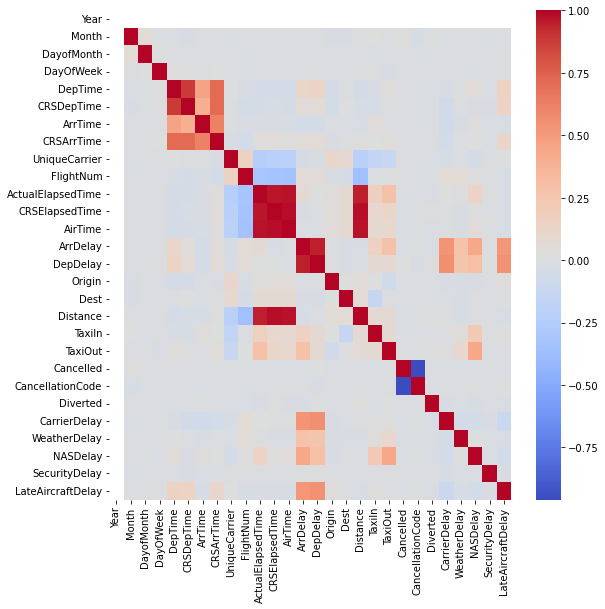

In [94]:
from seaborn import heatmap
corr = df_1.corr() # train is a pandas dataframe 

plt.figure(figsize = (9, 9))
heatmap(corr, cmap = 'coolwarm')
plt.show()

In [95]:
#para no trabajar con casi 2millones de registros y no penalizar el coste de proceso en este ejercicio, tomamos 100.000 registros para trabajar
df_sample = df_1.sample(100000, random_state = 0)
X = np.array(df_sample.drop([forecast_col], 1))
y = np.array(df_sample[forecast_col])
print(len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

100000 100000


In [96]:
#Estandarització:

In [97]:
# Només cal que escalem els features, així el resultat ens surt sense escalar, com el volem:

X1 = StandardScaler().fit_transform(X)
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

LinearRegression sense train/test (validació interna):
El coeficiente de determinación del train es: 0.9934281155357932
El coeficiente de determinación del test  es: 0.9943719474480055
intercept                         : -15.575421955373805
Mean Absolute Error               : 2.7820604803960594
Mean Squared Error                : 18.45255372630452
Root Mean Squared Error           : 4.295643575333563
-------------------------------------------------------
DecisionTreeRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9955980470617869
El coeficiente de determinación Test  es : 0.985122922502983
Mean Absolute Error               : 3.2363558401259533
Mean Squared Error                : 48.777098164589205
Root Mean Squared Error           : 6.984060292164523
-------------------------------------------------------
RandomForestRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9984369698012924
El coeficiente 

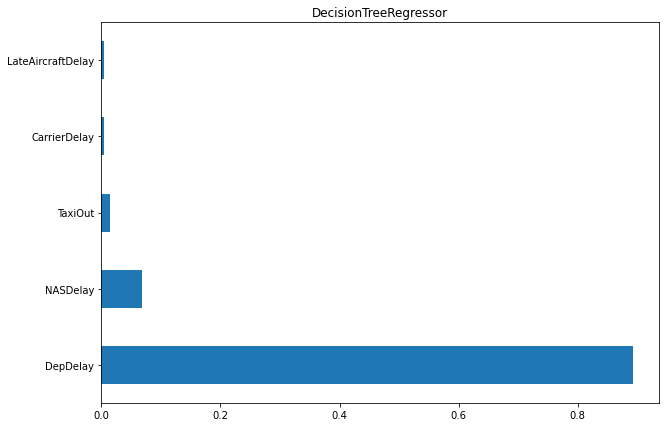

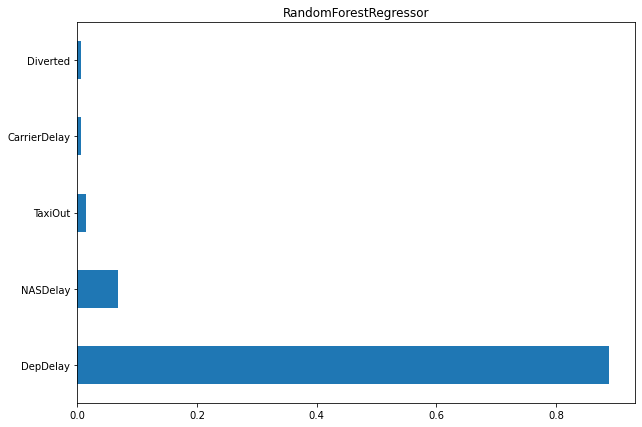

In [98]:
UseCaseModelizacion (df_sample, X1_train, y1_train, X1_test, y1_test )

In [99]:
#Conclusiones: Identicas conclusiones que en el caso anterior.

In [100]:
#Normalització

In [101]:
X1 =preprocessing.normalize(X)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

LinearRegression sense train/test (validació interna):
El coeficiente de determinación del train es: 0.9489444030362361
El coeficiente de determinación del test  es: 0.9486890985708964
intercept                         : 49.63402425897202
Mean Absolute Error               : 7.422321336702419
Mean Squared Error                : 168.23175629909682
Root Mean Squared Error           : 12.970418509018774
-------------------------------------------------------
DecisionTreeRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9925101981966736
El coeficiente de determinación Test  es : 0.9615731555442881
Mean Absolute Error               : 5.560145183464519
Mean Squared Error                : 125.9891241776134
Root Mean Squared Error           : 11.224487702234494
-------------------------------------------------------
RandomForestRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9972672637065919
El coeficiente d

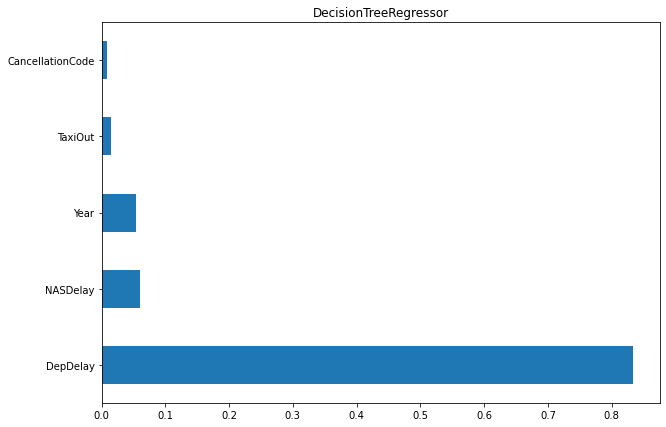

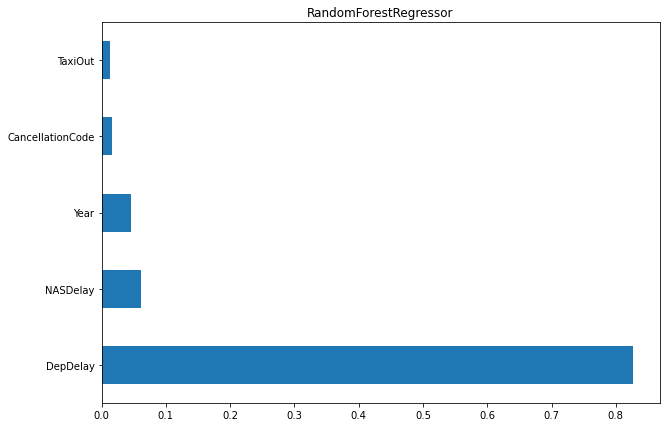

In [102]:
UseCaseModelizacion (df_sample, X1_train, y1_train, X1_test, y1_test )

In [103]:
# Conclusiones: En este caso RandomForest es el que mejor resultados da.

In [104]:
#Transformació logarítmica dels features

In [105]:
# Transformació dels features a log.
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import QuantileTransformer, quantile_transform

X1 = quantile_transform(X, n_quantiles=900, output_distribution='normal', copy=True, random_state = 0).squeeze()

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

LinearRegression sense train/test (validació interna):
El coeficiente de determinación del train es: 0.9934281155357932
El coeficiente de determinación del test  es: 0.9943719474480055
intercept                         : -15.575421955373805
Mean Absolute Error               : 2.7820604803960594
Mean Squared Error                : 18.45255372630452
Root Mean Squared Error           : 4.295643575333563
-------------------------------------------------------
DecisionTreeRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9955980470617869
El coeficiente de determinación Test  es : 0.985122922502983
Mean Absolute Error               : 3.2363558401259533
Mean Squared Error                : 48.777098164589205
Root Mean Squared Error           : 6.984060292164523
-------------------------------------------------------
RandomForestRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9984369698012924
El coeficiente 

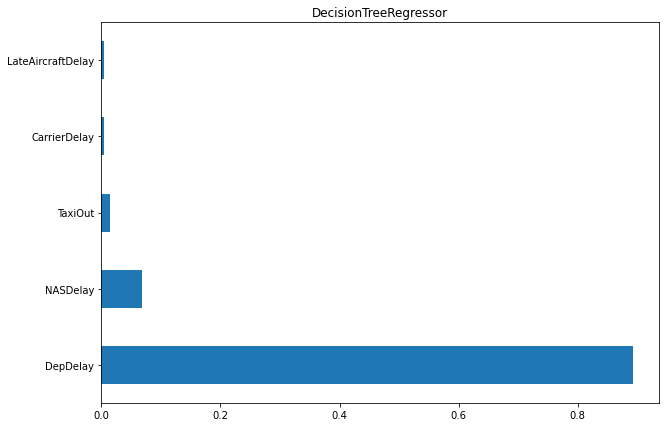

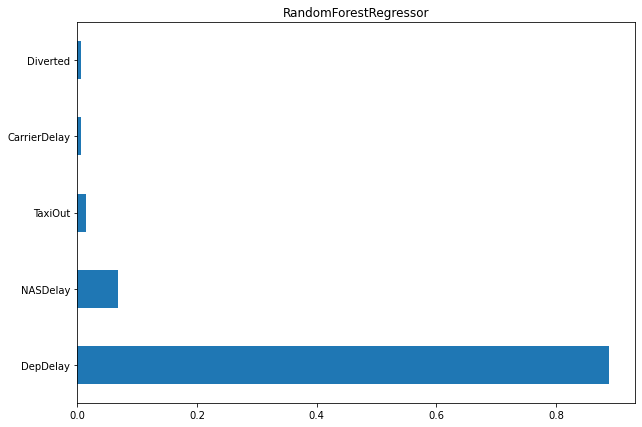

In [106]:
UseCaseModelizacion (df_sample, X1_train, y1_train, X1_test, y1_test )

In [107]:
# Conclusiones: En este caso RandomForest es el que mejor resultados da.

In [108]:
# PCA

In [109]:
# Abans d'aplicar el PCA hem d'estanderitzar les dades:
X1 = StandardScaler().fit_transform(X)
# Principal Component Analysys

pca = PCA(n_components=0.9)
X1 = pca.fit_transform(X1)

print('La variància de cada un dels components seleccionats és:',pca.explained_variance_ratio_) # Treiem els variance ratio del número de components seleccionats
print('La suma de la variància de tots els components seleccionats:',pca.explained_variance_ratio_.sum()) # Sumem el variance ratio per veure quanta informació treiem amb el número de PCA

#Per retenir un 90% de la informació total fent servir PCA, ens hem de quedar amb 15 dels 20 atributs totals. No és un PCA molt eficaç.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

La variància de cada un dels components seleccionats és: [0.16153152 0.11388473 0.07571555 0.07353252 0.05797435 0.04492533
 0.04312939 0.0409883  0.04038816 0.03903002 0.03860123 0.03847313
 0.03802615 0.03586501 0.03289627 0.03195477]
La suma de la variància de tots els components seleccionats: 0.9069164353803166


In [110]:
UseCaseModelizacion (df_sample, X1_train, y1_train, X1_test, y1_test )

LinearRegression sense train/test (validació interna):
El coeficiente de determinación del train es: 0.9702933831198896
El coeficiente de determinación del test  es: 0.9705228941135133
intercept                         : 42.43060508508331
Mean Absolute Error               : 7.184516810642541
Mean Squared Error                : 96.64584241908031
Root Mean Squared Error           : 9.830861733290744
-------------------------------------------------------
DecisionTreeRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9876126063297427
El coeficiente de determinación Test  es : 0.955807614215636
Mean Absolute Error               : 8.755841609742744
Mean Squared Error                : 144.8924588827027
Root Mean Squared Error           : 12.037128348684444


ValueError: Length of values (16) does not match length of index (27)

<Figure size 720x504 with 0 Axes>

In [111]:
# Feature selection amb f_regression

In [112]:
features = getTopFeatures(X,y) 
features

columns = []
for i in features:
    x = df_1.columns[i]
    columns.append(x)
    
#print(columns)

df_top_features = df_1[columns]
# Afegim el target al nou df:

#df_top_features[forecast_col] = df_1[forecast_col]
#df_top_features['ArrDelay'] = df['ArrDelay']
#df_top_features['ArrDelay'] = df_1.loc[:,('ArrDelay')]
#


#Agafem la mostra del nou df amb els 'top features' seleccionats:
df_2_sample = df_top_features.sample(100000, random_state = 0)
X1 = np.array(df_2_sample.drop([forecast_col], 1))
y1 = np.array(df_2_sample[forecast_col])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

C:\Users\comercial7\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\comercial7\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


LinearRegression sense train/test (validació interna):
El coeficiente de determinación del train es: 0.48615128146292264
El coeficiente de determinación del test  es: 0.45492797586930767
intercept                         : -22.816772210055326
Mean Absolute Error               : 26.51540080989459
Mean Squared Error                : 1787.1138759023763
Root Mean Squared Error           : 42.274269667285516
-------------------------------------------------------
DecisionTreeRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.7644885173774845
El coeficiente de determinación Test  es : 0.5540884135846535
Mean Absolute Error               : 20.479954973063908
Mean Squared Error                : 1461.9990537570413
Root Mean Squared Error           : 38.23609621492552
-------------------------------------------------------
RandomForestRegressor sense train/test (validació interna):
El coeficiente de determinación Train es : 0.9496283994750347
El coeficie

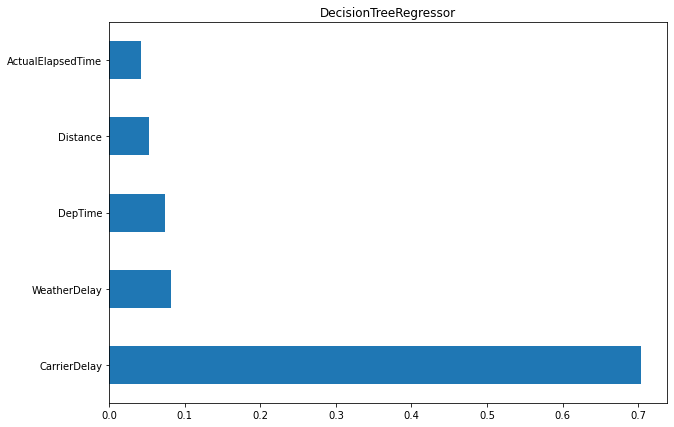

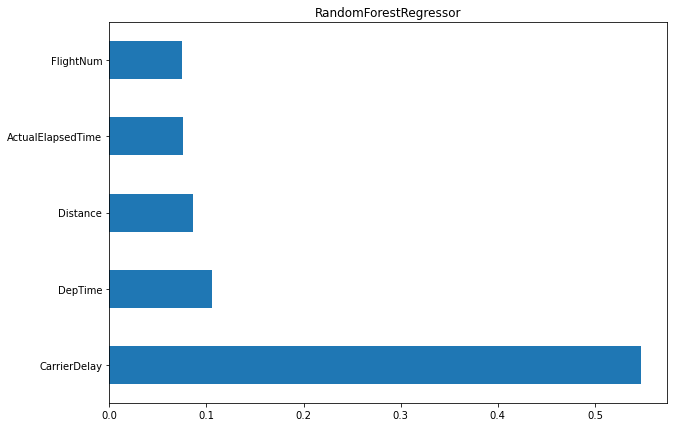

In [113]:
UseCaseModelizacion (df_2_sample, X1_train, y1_train, X1_test, y1_test )

In [114]:
# Conclusió: observem que en el cas de voler predir l'enderreriment dels vols, la selecció d'atributs no és una bona estratègia. Com més atributs treiem, més incrementen el MAE, MSE i l'RMSE. 
# Per altra banda el fet d'afegir les variables categòriques (que inicialment haviem descartat) mitjançant un Label Encoder, tampoc ajuda a millorar les mètriques. 
# En canvi, el procés d'estanderització sí que ha fet augmentar la precisió de les prediccions.

# Nivell 3
##  Exercici 3
### Resumeix les noves columnes generades de manera estadística i gràfica

In [115]:
# NO entiendo que se tiene que hacer